In [21]:
import kagglehub
 
# Download latest version
path = kagglehub.dataset_download("saurabhbadole/latest-data-science-job-salaries-2024")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\valer\.cache\kagglehub\datasets\saurabhbadole\latest-data-science-job-salaries-2024\versions\3


In [22]:
import os
dataset_path = kagglehub.dataset_download("saurabhbadole/latest-data-science-job-salaries-2024")

for filename in os.listdir(dataset_path):
    if filename.endswith(".csv"):
        csv_path = os.path.join(dataset_path, filename)
        break


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(csv_path)
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Research Scientist,208000,USD,208000,US,0,US,M
1,2025,MI,FT,Research Scientist,147000,USD,147000,US,0,US,M
2,2025,SE,FT,Research Scientist,173000,USD,173000,US,0,US,M
3,2025,SE,FT,Research Scientist,117000,USD,117000,US,0,US,M
4,2025,MI,FT,AI Engineer,100000,USD,100000,US,100,US,M


Shows how salaries vary across dataset entries. Each point represents an individual job record, helping visualize overall salary trends.

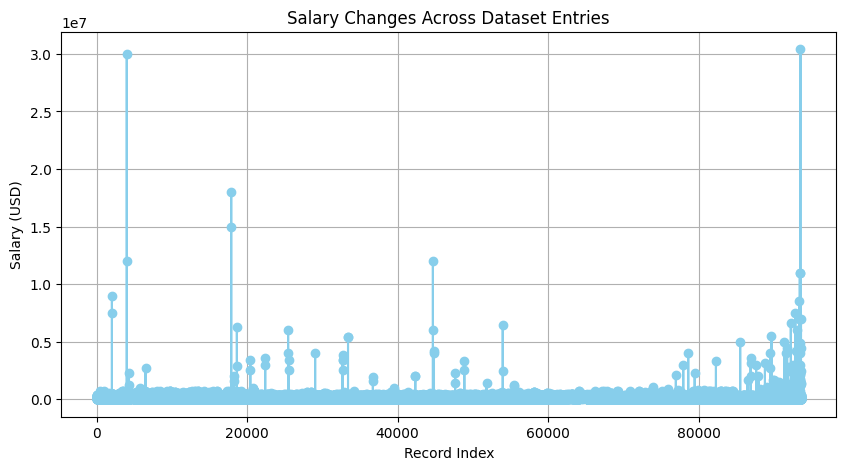

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(df['salary'], marker='o', linestyle='-', color='skyblue')
plt.title("Salary Changes Across Dataset Entries")
plt.xlabel("Record Index")
plt.ylabel("Salary (USD)")
plt.grid(True)
plt.show()

Multiple salaries in the same year are averaged → smooth trend


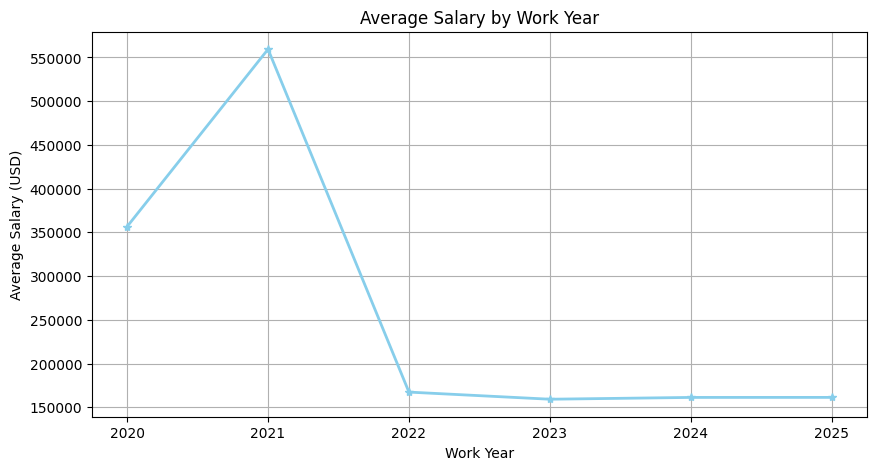

In [25]:
avg_salary_per_year = df.groupby('work_year')['salary'].mean()

plt.figure(figsize=(10, 5))
avg_salary_per_year.plot(kind='line', marker='*', color='skyblue', linewidth=2)
plt.title("Average Salary by Work Year")
plt.xlabel("Work Year")
plt.ylabel("Average Salary (USD)")
plt.grid(True)
plt.show()

Histogram showing how many employees started in each year. Useful for identifying hiring trends over time

<Axes: ylabel='Frequency'>

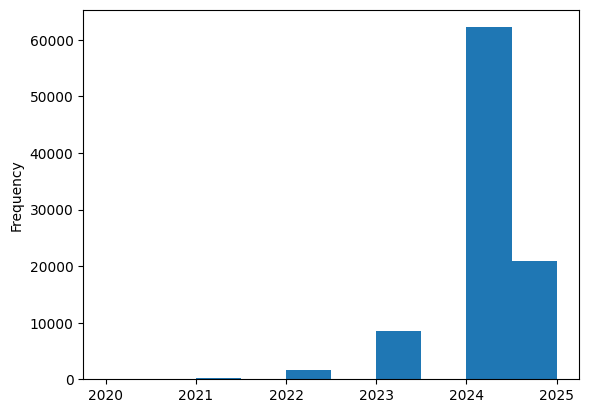

In [26]:
df['work_year'].plot(kind = "hist")


Visualizes the relationship between experience level and salary. Helps understand how salary scales with experience. 

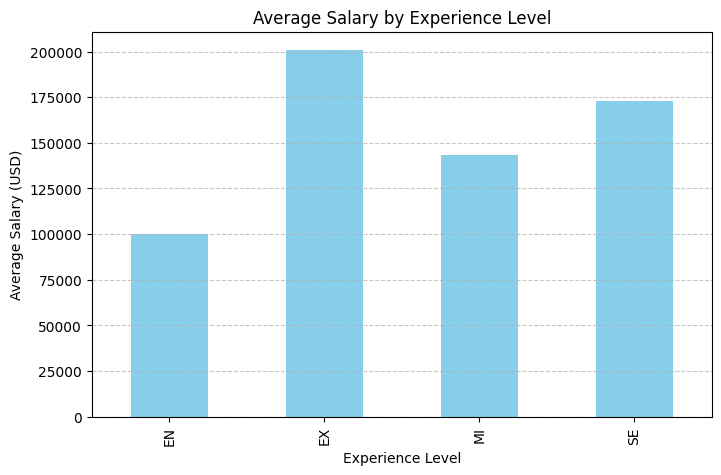

In [27]:
avg_salary_exp = df.groupby('experience_level')['salary_in_usd'].mean()

plt.figure(figsize=(8, 5))
avg_salary_exp.plot(kind='bar', color='skyblue')
plt.title("Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Left: Bottom 5 job titles with the lowest average salary.

Right: Top 5 job titles with the highest average salary. Highlights salary disparities between roles.

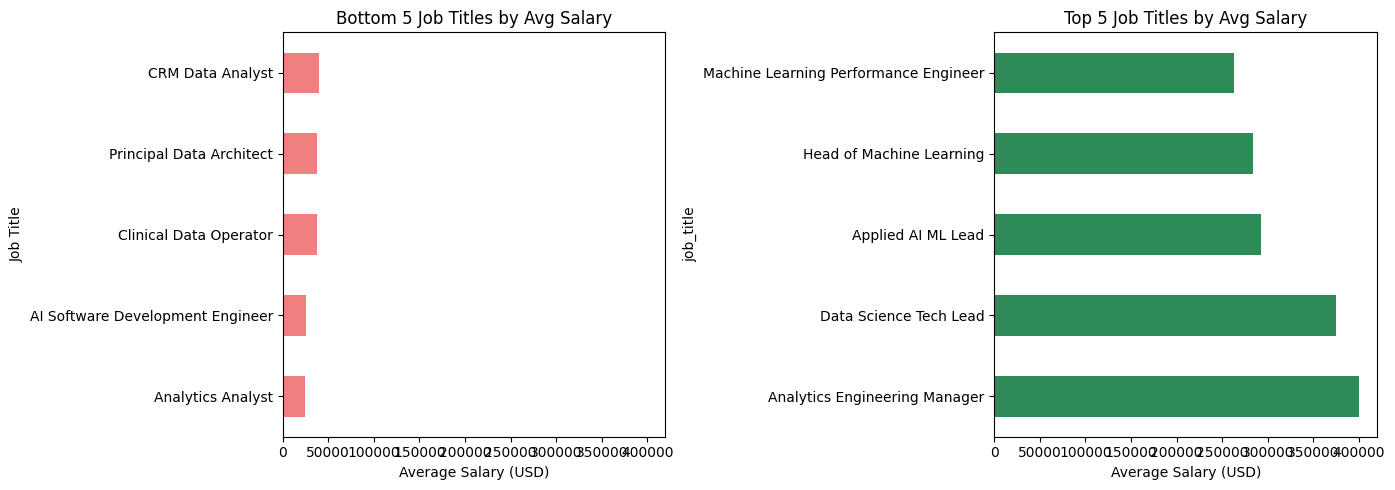

In [28]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5), sharex=True)
avg_salary_by_job = df.groupby('job_title')['salary_in_usd'].mean().sort_values()
bottom_5 = avg_salary_by_job.nsmallest(5)
top_5 = avg_salary_by_job.nlargest(5)

bottom_5.plot(kind='barh', ax=axes[0], color='lightcoral')
axes[0].set_title("Bottom 5 Job Titles by Avg Salary")
axes[0].set_xlabel("Average Salary (USD)")
axes[0].set_ylabel("Job Title")

top_5.plot(kind='barh', ax=axes[1], color='seagreen')
axes[1].set_title("Top 5 Job Titles by Avg Salary")
axes[1].set_xlabel("Average Salary (USD)")

plt.tight_layout()
plt.show()


Shows which countries pay the highest average salaries in data science roles. Useful for geographic salary comparison.

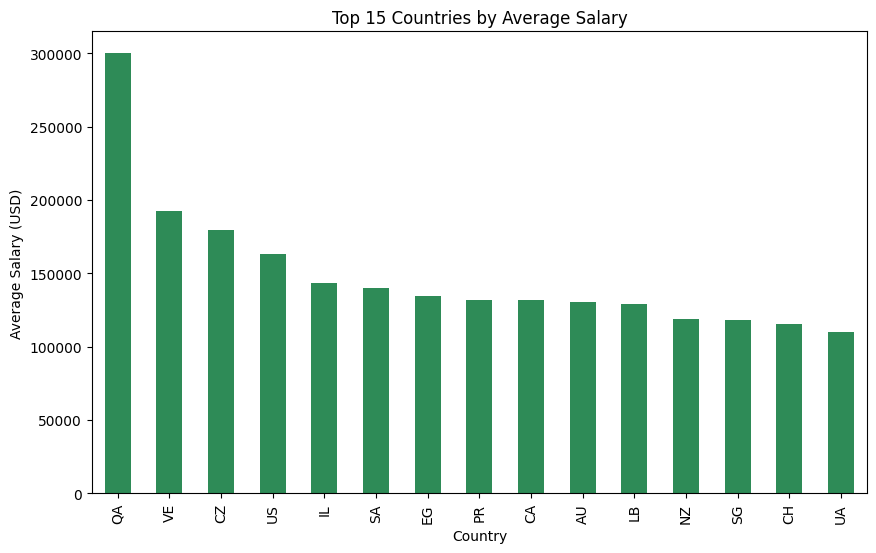

In [29]:
avg_salary_by_country = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
avg_salary_by_country.plot(kind='bar', color='seagreen')
plt.title("Top 15 Countries by Average Salary")
plt.ylabel("Average Salary (USD)")
plt.xlabel("Country")
plt.show()


Scatter plot illustrating salary distribution by experience level, excluding outliers. Helps observe typical salary trends more clearly

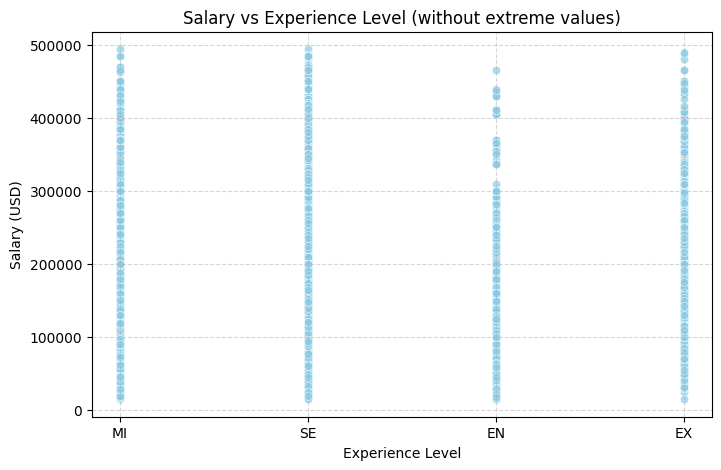

In [30]:
filtered_df = df[df['salary_in_usd'] < 500000]

plt.figure(figsize=(8, 5))
sns.scatterplot(x='experience_level', y='salary_in_usd', data=filtered_df, color='skyblue', alpha=0.7)
plt.title("Salary vs Experience Level (without extreme values)")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

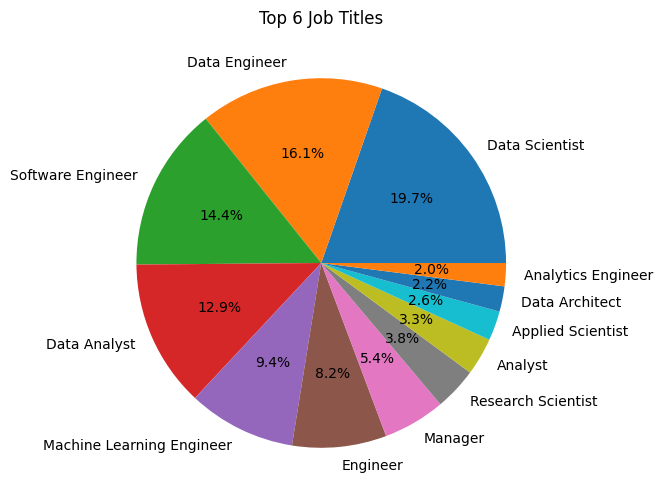

In [31]:
job_counts = df['job_title'].value_counts().head(12)
plt.figure(figsize=(6, 6))
job_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Top 6 Job Titles")
plt.ylabel("")
plt.show()

Pie chart showing the distribution of the most common job titles in the dataset. Visualizes the relative prevalence of roles

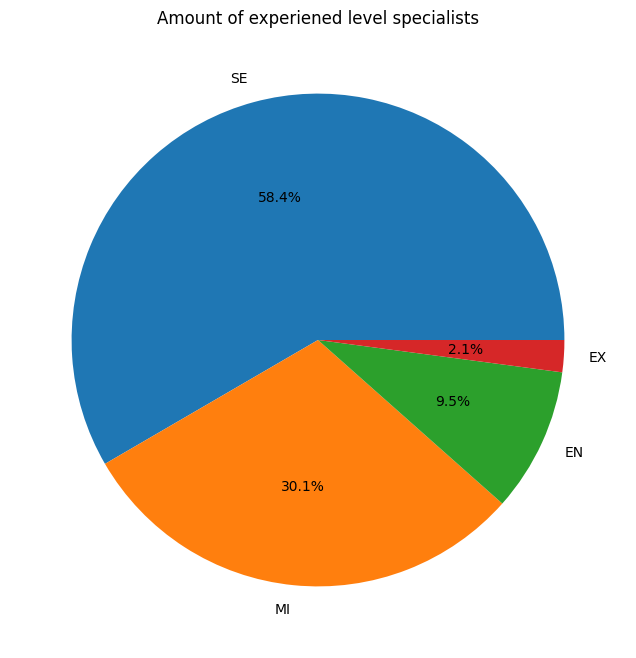

In [32]:
job_counts = df['experience_level'].value_counts().head(4)
plt.figure(figsize=(8, 8))
job_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Amount of experiened level specialists")
plt.ylabel("")
plt.show()

Pie chart of the number of specialists at different experience levels. Helps understand workforce composition by experienc

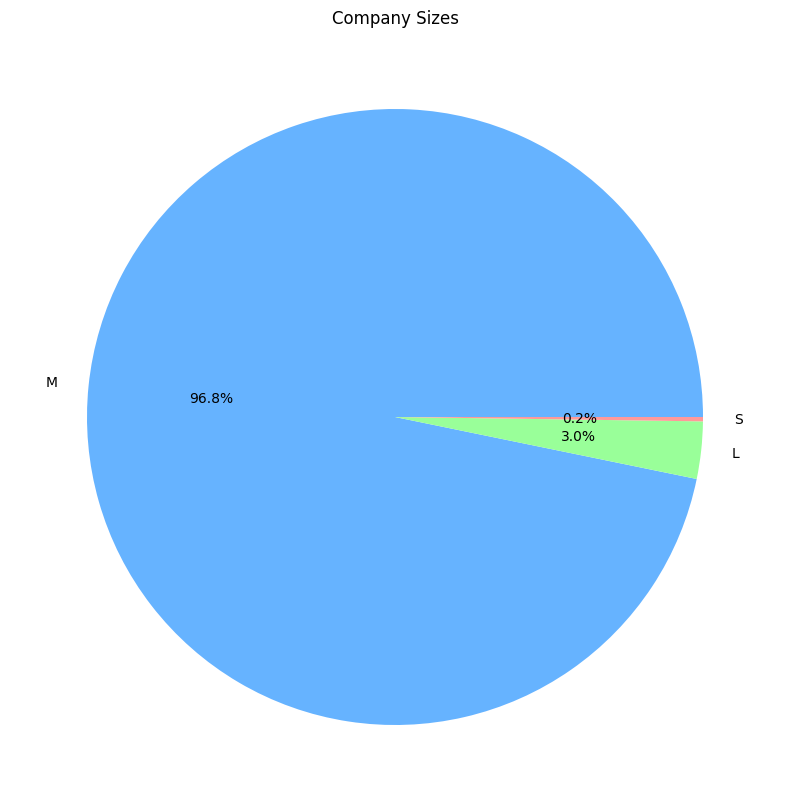

In [33]:
company_sizes = df['company_size'].value_counts()
plt.figure(figsize=(10,10))
company_sizes.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ff9999'])
plt.title("Company Sizes")
plt.ylabel("")
plt.show()

Pie chart showing the distribution of companies by size (small, medium, large). Helps see which company sizes are most common in the dataset